Número de clústeres: 563
Número de puntos de ruido: 2430


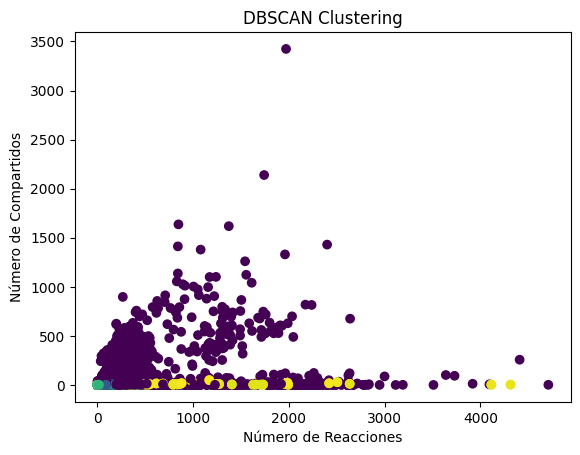

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import cKDTree

def dbscan(datos, epsilon, min_pts):
    etiquetas = np.full(len(datos), -1, dtype=int) 
    cluster_id = 0
    
    tree = cKDTree(datos)
    
    for i in range(len(datos)):
        if etiquetas[i] != -1:
            continue 
        vecinos = tree.query_ball_point(datos[i], epsilon)
        if len(vecinos) < min_pts:
            etiquetas[i] = -1 
        else:
            cluster_id += 1
            expandir_cluster(datos, etiquetas, i, vecinos, cluster_id, epsilon, min_pts, tree)

    return etiquetas

def expandir_cluster(datos, etiquetas, punto_actual, vecinos, cluster_id, epsilon, min_pts, tree):
    etiquetas[punto_actual] = cluster_id
    i = 0
    while i < len(vecinos):
        punto = vecinos[i]
        if etiquetas[punto] == -1:
            vecinos_vecinos = tree.query_ball_point(datos[punto], epsilon)
            if len(vecinos_vecinos) >= min_pts:
                vecinos.extend(vecinos_vecinos)
        if etiquetas[punto] == -1 or etiquetas[punto] == 0:
            etiquetas[punto] = cluster_id
        i += 1

archivo_csv = 'live.csv'
data = pd.read_csv(archivo_csv)

columnas_seleccionadas = ['num_reactions', 'num_shares']
X = data[columnas_seleccionadas].values

epsilon = 0.9

min_samples = 2

dbscan_labels = dbscan(X, epsilon, min_samples)
data['DBSCAN_Labels'] = dbscan_labels

num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print("Número de clústeres:", num_clusters)
num_noise_points = list(dbscan_labels).count(-1)
print("Número de puntos de ruido:", num_noise_points)


plt.scatter(data['num_reactions'], data['num_shares'], c=dbscan_labels, cmap='viridis')
plt.xlabel('Número de Reacciones')
plt.ylabel('Número de Compartidos')
plt.title('DBSCAN Clustering')
plt.show()

